In [28]:
import torch
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch.nn as nn

In [41]:
def class_num_to_name(i):
    if i == 0: 
        return 86000.0
    elif i == 1: 
        return 93000.0
    elif i == 2: 
        return 70032.0
    elif i == 3: 
        return 90000.0
    elif i == 4: 
        return 74000.0
    elif i == 5: 
        return 88000.0
    elif i == 6: 
        return 70000.0
    elif i == 7: 
        return 80000.0
    elif i == 8: 
        return 30000.0
    elif i == 9: 
        return 65030.0
    elif i == 10: 
        return 65000.0
    elif i == 11: 
        return 99000.0       

In [20]:
df_train = pd.read_csv('data/raw/lithology.csv', sep=';')
df_train.head()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,Carbon_Index,Normalized_RHOB,Normalized_GR,Delta_DTC,Delta_RHOB,Delta_GR,Delta_DEPTH_MD,Delta_Carbon_Index,GROUP_encoded,FORMATION_encoded
0,494.528,437641.96875,6470972.5,-469.501831,19.480835,-999.0,1.611410,1.798681,1.884186,80.200851,...,24.735691,0.314847,0.150172,-0.000000,-0.000000,-0.000000,0.000,0.000000,6,68
1,494.680,437641.96875,6470972.5,-469.653809,19.468800,-999.0,1.618070,1.795641,1.889794,79.262886,...,24.492376,0.318528,0.148269,0.527710,-0.005608,0.937965,0.152,-0.243315,6,68
2,494.832,437641.96875,6470972.5,-469.805786,19.468800,-999.0,1.626459,1.800733,1.896523,74.821999,...,24.202299,0.322946,0.139258,0.429855,-0.006729,4.440887,0.152,-0.290077,6,68
3,494.984,437641.96875,6470972.5,-469.957794,19.459282,-999.0,1.621594,1.801517,1.891913,72.878922,...,24.400797,0.319919,0.135315,0.024185,0.004610,1.943077,0.152,0.198498,6,68
4,495.136,437641.96875,6470972.5,-470.109772,19.453100,-999.0,1.602679,1.795299,1.880034,71.729141,...,24.916765,0.312121,0.132982,0.021088,0.011879,1.149780,0.152,0.515968,6,68


In [4]:
df_hidden = pd.read_csv('data/raw/hidden.csv', sep=';')
df_hidden

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,Carbon_Index,Normalized_RHOB,Normalized_GR,Delta_DTC,Delta_RHOB,Delta_GR,Delta_DEPTH_MD,Delta_Carbon_Index,GROUP_encoded,FORMATION_encoded
0,1518.2800,433906.7500,6460000.5,-1493.241821,15.506232,-999.0,-999.000000,0.878615,-999.0,103.451515,...,-999.0,-999.0,0.229715,-0.000000,-999.0,-0.000000,0.000,-999.0,5,51
1,1518.4320,433906.7500,6460000.5,-1493.393799,18.524611,-999.0,-999.000000,0.874237,-999.0,94.124893,...,-999.0,-999.0,0.206369,1.616959,-999.0,9.326622,0.152,-999.0,5,51
2,1518.5840,433906.7500,6460000.5,-1493.545776,18.855669,-999.0,-999.000000,0.869858,-999.0,93.586487,...,-999.0,-999.0,0.205021,0.131363,-999.0,0.538406,0.152,-999.0,5,51
3,1518.7360,433906.7500,6460000.5,-1493.697754,19.163353,-999.0,-999.000000,0.865479,-999.0,91.113373,...,-999.0,-999.0,0.198831,1.637512,-999.0,2.473114,0.152,-999.0,5,51
4,1518.8880,433906.7500,6460000.5,-1493.849609,18.489744,-999.0,0.849849,0.863804,-999.0,100.228333,...,-999.0,-999.0,0.221647,0.819153,-999.0,-9.114960,0.152,-999.0,5,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122392,2973.2988,536096.0625,6793022.0,-2943.444580,8.276272,-999.0,2.820439,3.158570,-999.0,90.720284,...,-999.0,-999.0,0.455601,0.591225,-999.0,1.536675,0.152,-999.0,0,16
122393,2973.4508,536096.0625,6793022.0,-2943.595947,8.267273,-999.0,3.020778,3.332977,-999.0,87.062027,...,-999.0,-999.0,0.436064,0.392357,-999.0,3.658257,0.152,-999.0,0,16
122394,2973.6028,536096.0625,6793022.0,-2943.747559,8.250099,-999.0,2.795711,3.044179,-999.0,86.115921,...,-999.0,-999.0,0.431012,0.020180,-999.0,0.946106,0.152,-999.0,0,16
122395,2973.7548,536096.0625,6793022.0,-2943.899170,-999.000000,-999.0,2.658694,2.847681,-999.0,89.497131,...,-999.0,-999.0,0.449069,-0.115906,-999.0,-3.381210,0.152,-999.0,0,16


In [26]:
X_FEATURES = ['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RSHA', 'RMED', 'RDEP',
    'RHOB', 'GR', 'NPHI', 'PEF','DTC', 'SP', 'BS', 'ROP', 'DCAL', 'DRHO',
    'MUDWEIGHT', 'RMIC', 'Carbon_Index',
    'Normalized_RHOB', 'Normalized_GR', 'Delta_DTC', 'Delta_RHOB',
    'Delta_GR', 'Delta_DEPTH_MD', 'Delta_Carbon_Index', 'GROUP_encoded',
    'FORMATION_encoded']
Y_FEATURE = ['FORCE_2020_LITHOFACIES_LITHOLOGY']    

In [29]:
X_lit = df_train[X_FEATURES]
Y_lit = df_train[Y_FEATURE]

X_hidden = df_hidden[X_FEATURES]

X_train_val, X_test, y_train_val, y_test = train_test_split(X_lit, Y_lit,
                                                    stratify=Y_lit, 
                                                    test_size=0.2,
                                                    random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                    stratify=y_train_val, 
                                                    test_size=0.2,
                                                    random_state=42)


scl = MinMaxScaler()

X_train_transform = scl.fit_transform(X_train)
X_hidden_transform = scl.transform(X_hidden)

In [33]:
X_hidden_transform_tensor = torch.FloatTensor(X_hidden_transform)
X_hidden_transform_tensor

tensor([[0.2607, 0.0481, 0.1186,  ..., 0.0000, 0.3846, 0.7429],
        [0.2607, 0.0481, 0.1186,  ..., 0.0000, 0.3846, 0.7429],
        [0.2607, 0.0481, 0.1186,  ..., 0.0000, 0.3846, 0.7429],
        ...,
        [0.5353, 0.7493, 0.8586,  ..., 0.0000, 0.0000, 0.2429],
        [0.5353, 0.7493, 0.8586,  ..., 0.0000, 0.0000, 0.2429],
        [0.5353, 0.7493, 0.8586,  ..., 0.0000, 0.0000, 0.2429]])

### Unbalanced Model - Test 5

In [42]:
unbalanced_model = torch.load('data/model/test_5.pth')

with torch.no_grad():
    unbalanced_model.eval()
    y_hidden_pred = unbalanced_model(X_hidden_transform_tensor)
    y_hidden_hat = np.argmax(y_hidden_pred, axis=1).flatten()

df_hidden_pred = pd.DataFrame(y_hidden_hat.numpy(), columns=['lithology'])
df_hidden_pred.head()

,lithology
0,6
1,6
2,6
3,6
4,6


In [43]:
df_hidden_pred['lithology'] = df_hidden_pred['lithology'] .apply(lambda x: class_num_to_name(x))
df_hidden_pred.head()

,lithology
0,70000.0
1,70000.0
2,70000.0
3,70000.0
4,70000.0


In [44]:
df_hidden_pred.lithology.value_counts()

70000.0    28492
74000.0    19031
80000.0    18047
90000.0    17244
65030.0    13846
88000.0    12860
99000.0    11494
86000.0     1380
65000.0        3
Name: lithology, dtype: int64

<AxesSubplot:>

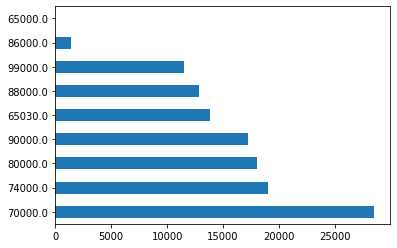

In [45]:
df_hidden_pred.lithology.value_counts().plot.barh()

Shale           65000.0         720803

Sandstone       30000.0         168937

Sandstone/Shale 65030.0         150455

Limestone       70000.0         56320

Marl            80000.0         33329

Tuff            99000.0         15245

Chalk           70032.0         10513

Halite          88000.0         8213

Coal            90000.0         3820

Dolomite        74000.0         1688

Anhydrite       86000.0         1085

Basement        93000.0         103

In [46]:
df_hidden_pred.to_csv('data/output/df_hidden_unbalanced.csv', index=False)

### Balanced Model - Test 6

In [47]:
balanced_model = torch.load('data/model/test_6.pth')

with torch.no_grad():
    balanced_model.eval()
    y_hidden_pred = balanced_model(X_hidden_transform_tensor)
    y_hidden_hat = np.argmax(y_hidden_pred, axis=1).flatten()

df_hidden_pred = pd.DataFrame(y_hidden_hat.numpy(), columns=['lithology'])
df_hidden_pred.head()

,lithology
0,9
1,9
2,9
3,9
4,6


In [48]:
df_hidden_pred['lithology'] = df_hidden_pred['lithology'] .apply(lambda x: class_num_to_name(x))
df_hidden_pred.head()

,lithology
0,65030.0
1,65030.0
2,65030.0
3,65030.0
4,70000.0


In [49]:
df_hidden_pred.lithology.value_counts()

74000.0    30167
70000.0    25873
65030.0    21771
99000.0    16993
90000.0    13719
80000.0     8487
93000.0     3372
88000.0     1265
86000.0      554
30000.0      191
65000.0        5
Name: lithology, dtype: int64

<AxesSubplot:>

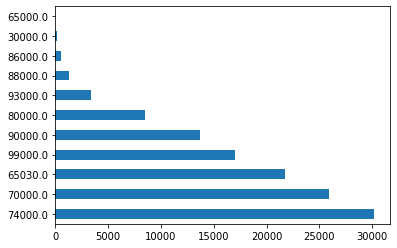

In [50]:
df_hidden_pred.lithology.value_counts().plot.barh()

Shale           65000.0         720803

Sandstone       30000.0         168937

Sandstone/Shale 65030.0         150455

Limestone       70000.0         56320

Marl            80000.0         33329

Tuff            99000.0         15245

Chalk           70032.0         10513

Halite          88000.0         8213

Coal            90000.0         3820

Dolomite        74000.0         1688

Anhydrite       86000.0         1085

Basement        93000.0         103

In [51]:
df_hidden_pred.to_csv('data/output/df_hidden_balanced.csv', index=False)